In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [2]:
df = pd.read_csv("C:/Users/abro1/Desktop/DataProjects/laptop_data.csv",)
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [3]:
df.tail()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
1298,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.64
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.72
1300,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.12
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.92
1302,1302,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows 10,2.2kg,19660.32


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [5]:
print(df.columns)

Index(['Unnamed: 0', 'Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')


In [6]:
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [7]:
df[['Company', 'Price']].head()

,Company,Price
0,Apple,71378.6832
1,Apple,47895.5232
2,HP,30636.0000
3,Apple,135195.3360
4,Apple,96095.8080


In [10]:
average_price = df['Price'].mean()
print(average_price)

59870.042910207216


In [11]:
max_index_price = df['Price'].idxmax()
max_price_laptop = df.iloc[max_index_price]
print("Laptop with highest price:" , max_price_laptop)

Laptop with highest price: Unnamed: 0                                          196
Company                                           Razer
TypeName                                         Gaming
Inches                                             17.3
ScreenResolution    4K Ultra HD / Touchscreen 3840x2160
Cpu                         Intel Core i7 7820HK 2.9GHz
Ram                                                32GB
Memory                                          1TB SSD
Gpu                             Nvidia GeForce GTX 1080
OpSys                                        Windows 10
Weight                                           3.49kg
Price                                         324954.72
Name: 196, dtype: object


In [12]:
min_index_price = df['Price'].idxmin()
min_price_laptop = df.iloc[min_index_price]
print("Latop with lowest price:" , min_price_laptop)

Latop with lowest price: Unnamed: 0                                          1215
Company                                             Acer
TypeName                                         Netbook
Inches                                              11.6
ScreenResolution                                1366x768
Cpu                 Intel Celeron Dual Core 3205U 1.5GHz
Ram                                                  2GB
Memory                                          32GB SSD
Gpu                                    Intel HD Graphics
OpSys                                          Chrome OS
Weight                                             1.3kg
Price                                            9270.72
Name: 1215, dtype: object


In [13]:
def remove_unit(label):
    return label.replace('GB', '').replace('kg', '')
df['Ram'] = df['Ram'].apply(remove_unit)
df['Weight'] = df['Weight'].apply(remove_unit)
print(df)

      Unnamed: 0 Company            TypeName  Inches  \
0              0   Apple           Ultrabook    13.3   
1              1   Apple           Ultrabook    13.3   
2              2      HP            Notebook    15.6   
3              3   Apple           Ultrabook    15.4   
4              4   Apple           Ultrabook    13.3   
...          ...     ...                 ...     ...   
1298        1298  Lenovo  2 in 1 Convertible    14.0   
1299        1299  Lenovo  2 in 1 Convertible    13.3   
1300        1300  Lenovo            Notebook    14.0   
1301        1301      HP            Notebook    15.6   
1302        1302    Asus            Notebook    15.6   

                                ScreenResolution  \
0             IPS Panel Retina Display 2560x1600   
1                                       1440x900   
2                              Full HD 1920x1080   
3             IPS Panel Retina Display 2880x1800   
4             IPS Panel Retina Display 2560x1600   
...            

In [14]:
df.sort_values('Price', ascending = False)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
196,196,Razer,Gaming,17.3,4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7820HK 2.9GHz,32,1TB SSD,Nvidia GeForce GTX 1080,Windows 10,3.49,324954.720
830,830,Razer,Gaming,17.3,4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7820HK 2.9GHz,32,512GB SSD,Nvidia GeForce GTX 1080,Windows 10,3.49,292986.720
610,610,Lenovo,Notebook,15.6,IPS Panel 4K Ultra HD 3840x2160,Intel Xeon E3-1535M v6 3.1GHz,32,1TB SSD,Nvidia Quadro M2200M,Windows 10,2.5,261018.720
749,749,HP,Workstation,17.3,IPS Panel Full HD 1920x1080,Intel Xeon E3-1535M v5 2.9GHz,16,256GB SSD,Nvidia Quadro M2000M,Windows 7,3,233845.920
1066,1066,Asus,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 6820HK 2.7GHz,64,1TB SSD,Nvidia GeForce GTX 980,Windows 10,3.58,211788.000
...,...,...,...,...,...,...,...,...,...,...,...,...
290,290,Acer,Notebook,15.6,1366x768,Intel Celeron Dual Core 3205U 1.5GHz,2,16GB SSD,Intel HD Graphics,Chrome OS,2.19,10602.720
31,31,Asus,Notebook,14.0,1366x768,AMD E-Series E2-6110 1.5GHz,2,32GB Flash Storage,AMD Radeon R2,Windows 10,1.65,10602.720
1120,1120,Vero,Notebook,13.3,Full HD 1920x1080,Intel Atom X5-Z8350 1.44GHz,4,32GB Flash Storage,Intel HD Graphics 400,Windows 10,1.35,10442.880
20,20,Asus,Netbook,11.6,1366x768,Intel Atom x5-Z8350 1.44GHz,2,32GB Flash Storage,Intel HD Graphics 400,Windows 10,0.98,10224.432


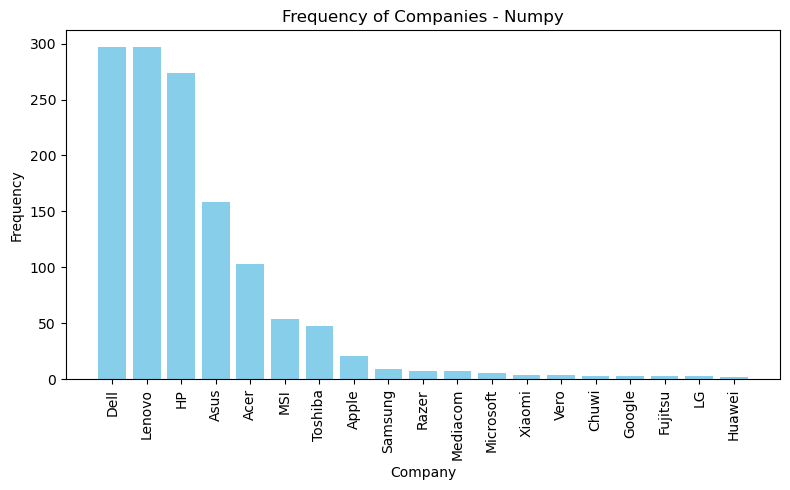

In [33]:
company_counts = df['Company'].value_counts()
company_names = company_counts.index

num_bins = len(company_names)
hist_values = company_counts.values # Assigned counts to the bins

plt.figure(figsize=(8, 5))
plt.bar(company_names, hist_values, color='skyblue')
plt.title('Frequency of Companies - Numpy')
plt.xlabel('Company')
plt.ylabel('Frequency')
plt.xticks(rotation=90) #Rotated x-axis for clearer presentation ( Company names )
plt.tight_layout() 
plt.show()


<function matplotlib.pyplot.xticks(ticks: 'ArrayLike | None' = None, labels: 'Sequence[str] | None' = None, *, minor: 'bool' = False, **kwargs) -> 'tuple[list[Tick] | np.ndarray, list[Text]]'>

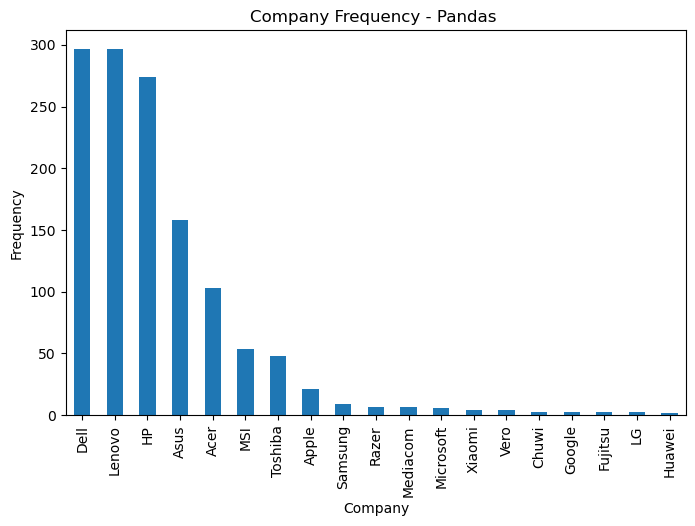

In [32]:
company_counts = df['Company'].value_counts()

plt.figure(figsize=(8,5))
company_counts.plot(kind ='bar')
plt.title('Company Frequency - Pandas ')
plt.xlabel('Company')
plt.ylabel('Frequency')
plt.xticks